In [1]:
import pandas
import geopandas
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

## Table of Contents<a id="toc"></a>

* [Overview](#over)
* Data
    * [Import Data](#data)
    * [Census Data](#census)
* [Plots](#plots)

### Overview <a id="over"></a>

Water insecurity dataset prepared for #Tidy/Tuesday

[data](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-01-28/readme.md)

### Data

#### Import Data <a id="data"></a>

In [3]:
water_insecurity_2022 = pandas.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-01-28/water_insecurity_2022.csv',
                                       dtype={'geoid': str,
                                              'name' : str,
                                              'year' : str}
                                       )
water_insecurity_2023 = pandas.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-01-28/water_insecurity_2023.csv',
                                       dtype={'geoid': str,
                                              'name' : str,
                                              'year' : str}
                                       )


In [4]:
water_insecurity_2022.dtypes

geoid                        object
name                         object
year                         object
geometry                     object
total_pop                     int64
plumbing                    float64
percent_lacking_plumbing    float64
dtype: object

In [5]:
water_insecurity_2022.shape

(848, 7)

In [6]:
water_insecurity_2022.head()


,geoid,name,year,geometry,total_pop,plumbing,percent_lacking_plumbing
0,01069,"Houston County, Alabama",2022,"list(list(c(975267.980555021, 975512.944547447...",108079,93.0,0.086048
1,04001,"Apache County, Arizona",2022,"list(list(c(-1229881.12883199, -1229880.911841...",65432,2440.0,3.729062
2,06037,"Los Angeles County, California",2022,"list(list(c(-2066923.36656991, -2066434.254456...",9721138,6195.0,0.063727
3,06097,"Sonoma County, California",2022,"list(list(c(-2336932.55009848, -2336646.078244...",482650,148.0,0.030664
4,06001,"Alameda County, California",2022,"list(list(c(-2268018.46097794, -2267167.564875...",1628997,808.0,0.049601


#### Census Data <a id="census"></a>

Downloaded county shapefiles from census.gov at this link: 
[Census Data](https://www.census.gov/cgi-bin/geo/shapefiles/index.php)


In [7]:
df = geopandas.read_file('/Users/suzyscatz/Downloads/tl_2024_us_county.zip')

In [8]:
df.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [9]:
df.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563042,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55525 41.82892, -96.55524 41.827..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980773,61564428,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.2645, -123.72756 46.26..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818941,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269508,22850511,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.5233, -96.69219 40.5231..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645201,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.2737 40.1184, -98.27374 40.1224,..."


#### Merge Data <a id="merge"></a>

In [10]:
# get nc map and merge plumbing info
# 37 is the North Carolina state FIPS code
ncmap = df[df.STATEFP=='37'].copy()

ncplumb = ncmap.merge(water_insecurity_2022[['geoid','name','year','total_pop','plumbing','percent_lacking_plumbing']],
            how='left',left_on='GEOID', right_on='geoid')

In [11]:

# Define the colors for the colormap
colors = ["blue", "white", "red"]

# Create the colormap
cmap = LinearSegmentedColormap.from_list("blue_white_red", colors)

In [12]:
ncplumb.sort_values(by='percent_lacking_plumbing',ascending=False)[['NAME','percent_lacking_plumbing']][:10]

,NAME,percent_lacking_plumbing
68,New Hanover,0.208581
13,Rowan,0.181095
30,Cleveland,0.155955
64,Johnston,0.137151
20,Carteret,0.116748
23,Wilkes,0.110969
63,Gaston,0.107593
2,Davidson,0.106614
43,Orange,0.096360
78,Burke,0.087618


### Plots <a id="plots"></a>

/var/folders/kd/42dk8lqj6nsby8x6lh40frfc0000gn/T/ipykernel_370/3543768962.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label, plumb in zip(ncplumb.geometry.centroid.x-0.1, ncplumb.geometry.centroid.y, ncplumb["NAME"], ncplumb['percent_lacking_plumbing']):


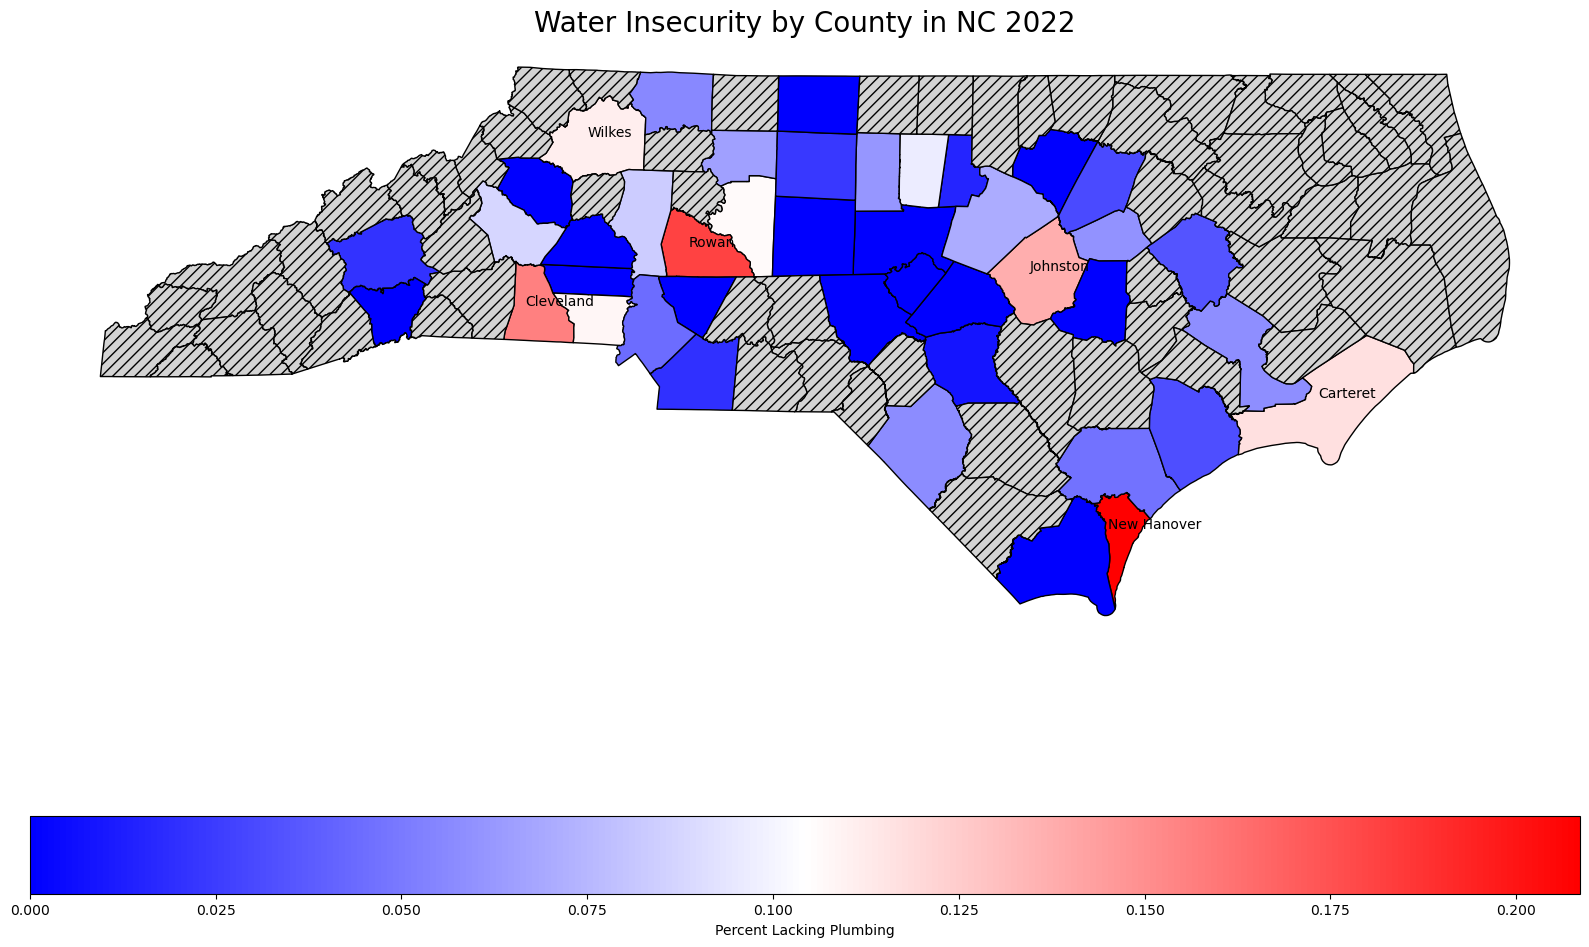

In [15]:
# plot with geopandas
ax = ncplumb.plot(column='percent_lacking_plumbing',
            legend=True,
             edgecolor='black',
             figsize=(20,15),
            legend_kwds = {'label' : 'Percent Lacking Plumbing',
                          'orientation' : 'horizontal'},
             missing_kwds = {'color' : 'lightgray',
                            'edgecolor' : 'black',
                            'label' : 'Missing values',
                            'hatch' : '///'},
            cmap=cmap)

for x, y, label, plumb in zip(ncplumb.geometry.centroid.x-0.1, ncplumb.geometry.centroid.y, ncplumb["NAME"], ncplumb['percent_lacking_plumbing']):
    if plumb > 0.11:
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

ax.set_axis_off()
ax.set_title('Water Insecurity by County in NC 2022',fontsize=20)
plt.savefig("ncplumbing.pdf")
plt.savefig("ncplumbing.png")

In [16]:
ncplumb23 = ncmap.merge(water_insecurity_2023[['geoid','name','year','total_pop','plumbing','percent_lacking_plumbing']],
            how='left',left_on='GEOID', right_on='geoid')

In [17]:
ncplumb23.sort_values(by='percent_lacking_plumbing',ascending=False)[['NAME','percent_lacking_plumbing']][:10]

,NAME,percent_lacking_plumbing
3,Franklin,0.361034
69,Pitt,0.235840
20,Carteret,0.208288
96,Surry,0.200106
45,Wilson,0.192478
73,Onslow,0.138059
92,Brunswick,0.136906
58,Catawba,0.136658
68,New Hanover,0.122251
55,Lee,0.095438


/var/folders/kd/42dk8lqj6nsby8x6lh40frfc0000gn/T/ipykernel_370/2209752174.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label, plumb in zip(ncplumb23.geometry.centroid.x-0.1, ncplumb23.geometry.centroid.y, ncplumb23["NAME"], ncplumb23['percent_lacking_plumbing']):


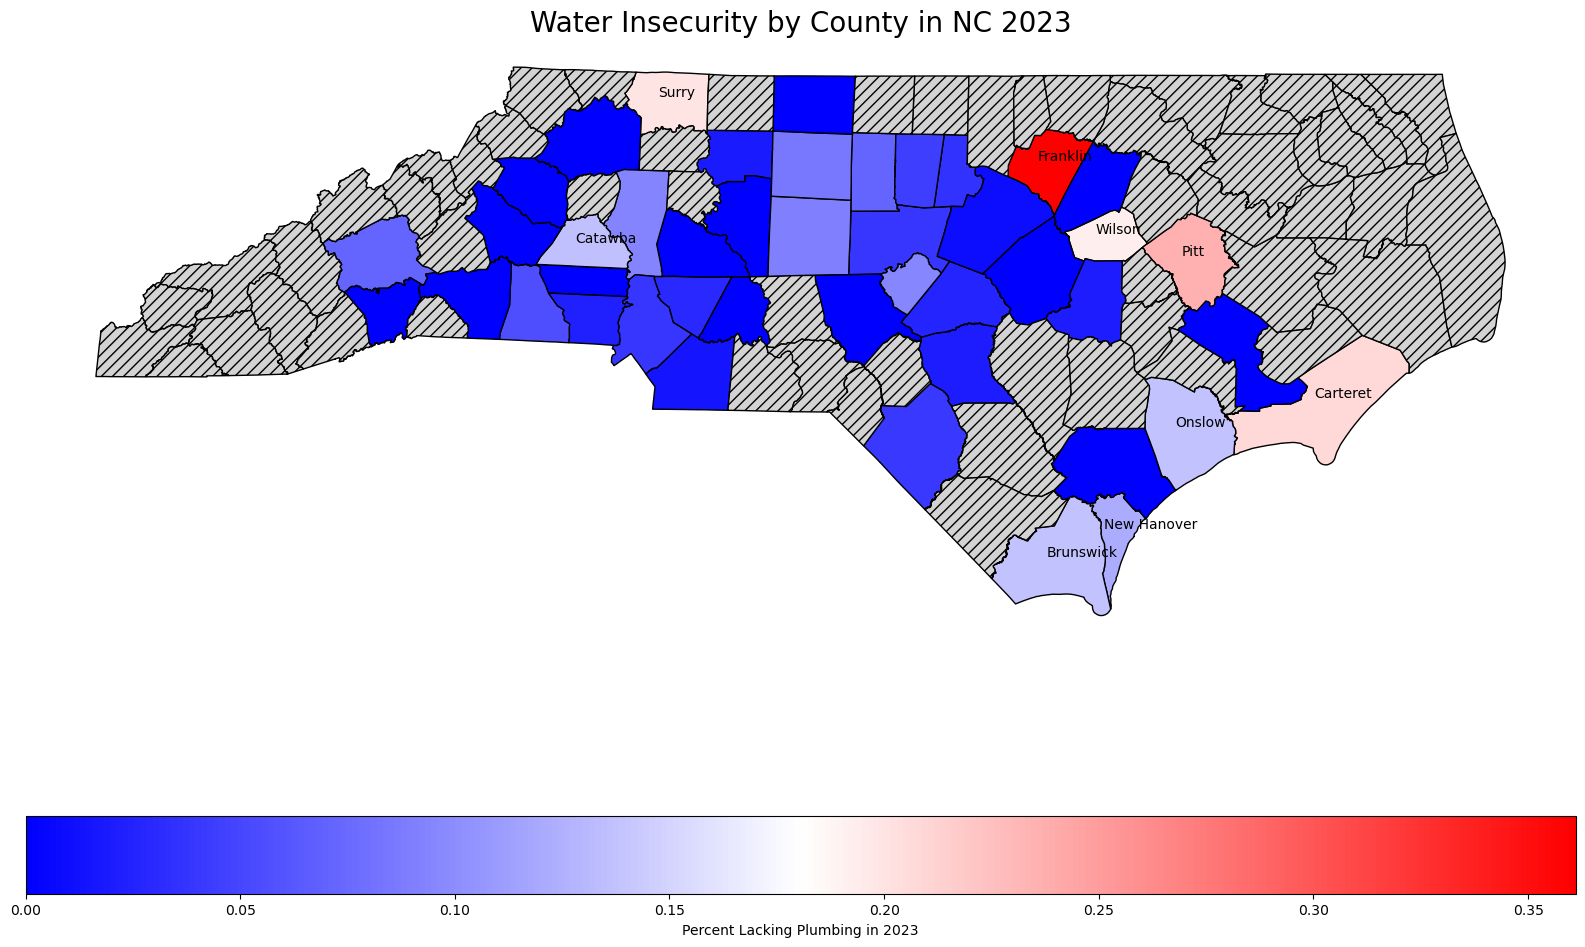

In [18]:
ax = ncplumb23.plot(column='percent_lacking_plumbing',
            legend=True,
             edgecolor='black',
             figsize=(20,15),
            legend_kwds = {'label' : 'Percent Lacking Plumbing in 2023',
                          'orientation' : 'horizontal'},
             missing_kwds = {'color' : 'lightgray',
                            'edgecolor' : 'black',
                            'label' : 'Missing values',
                            'hatch' : '///'},
            cmap=cmap)

for x, y, label, plumb in zip(ncplumb23.geometry.centroid.x-0.1, ncplumb23.geometry.centroid.y, ncplumb23["NAME"], ncplumb23['percent_lacking_plumbing']):
    if plumb > 0.11:
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

ax.set_axis_off()
ax.set_title('Water Insecurity by County in NC 2023',fontsize=20)
plt.savefig("ncplumbing23.pdf")
plt.savefig("ncplumbing23.png")

[Return to Top](#toc)